In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import re

In [2]:
pd.set_option("display.max_columns", None)

In [166]:
HT_df = pd.read_csv('gs://websitehumantrafficking/final_df.csv')
HT_df

/Users/sofiagiordano/.pyenv/versions/3.8.12/envs/ht_project/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning:

Columns (2,3,6,28,89,91,92,93,94,97,98,101,102,105,109,115,117) have mixed types.Specify dtype option on import or set low_memory=False.



,Unnamed: 0,Unnamed: 0.1,text,name,year,departure,arrival,latitude,longitude,gender,accuracy,meansOfControlDebtBondage,meansOfControlExcessiveWorkingHours,meansOfControlRestrictsMedicalCare,meansOfControlUsesChildren,control_method_witchcraft,meansOfControlPhysicalAbuse,meansOfControlPsychologicalAbuse,meansOfControlRestrictsFinancialAccess,meansOfControlRestrictsMovement,meansOfControlSexualAbuse,meansOfControlTakesEarnings,meansOfControlThreatOfLawEnforcement,meansOfControlThreats,meansOfControlPsychoactiveSubstances,meansOfControlWithholdsDocuments,meansOfControlWithholdsNecessities,meansOfControlFalsePromises,RecruiterRelationship,isAbduction,rec_method_online,rec_method_recagency,recruiterRelationIntimatePartner,recruiterRelationFamily,rec_method_social_media,traf_type_child,isSexualExploit,isForcedLabour,isForcedMarriage,traf_type_cmarriage,traf_type_domestic,traf_type_fcriminality,isForcedMilitary,traf_type_fpregnancy,traf_type_illegaladoption,isOrganRemoval,typeOfLabourHospitality,typeOfLabourAgriculture,typeOfLabourAquafarming,traf_industry_cleaning,typeOfLabourConstruction,typeOfLabourDomesticWork,typeOfLabourIllicitActivities,traf_subtype_forestry,traf_subtype_foodprocessing,traf_subtype_forcedbegging,traf_subtype_healthcare,traf_subtype_healthbeauty,traf_subtype_landscaping,typeOfLabourManufacturing,traf_industry_clothes_manufacturing,typeOfLabourMiningOrDrilling,typeOfSexProstitution,typeOfSexPornography,typeOfSexRemoteInteractiveServices,traf_industry_retail,traf_industry_sexualservitude,traf_industry_benefitfraud,transport_plane,transport_boat,transport_bus,transport_ferry,transport_motorbike,transport_onfoot,transport_car,transport_shippingcontainer,transport_taxi,transport_train,transport_truck,age_0_to_8,age_9_to_17,age_18_to_20,age_21_to_23,age_24_to_26,age_27_to_29,age_30-38,age_39_47,age_48+,ageBroad,url,arrival_1,arrival_2,arrival_3,theme_1,theme_2,date_slavery_from,date_slavery_to,bought_sold_for,any_money_mention,Datasource,majorityStatus,majorityStatusAtExploit,majorityEntry,meansOfControlOther,meansOfControlNotSpecified,meansOfControlConcatenated,isOtherExploit,isSexAndLabour,isSlaveryAndPractices,typeOfExploitConcatenated,typeOfLabourBegging,typeOfLabourPeddling,typeOfLabourTransportation,typeOfLabourOther,typeOfLabourNotSpecified,typeOfLabourConcatenated,typeOfSexPrivateSexualServices,typeOfSexConcatenated,recruiterRelationFriend,recruiterRelationOther,recruiterRelationUnknown,alpha_3
0,0,0,My name is Vi. And I am 28 years old. I arrive...,Vi,2001.0,Vietnam,American Samoa,-14.354000,-170.773600,female,67.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,http://antislavery.ac.uk/items/show/7,American Samoa,NaN,NaN,Forced labour,NaN,NaN,NaN,[],"[('408', '$'), ('4000', '$'), ('2000', '$'), (...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASM
1,1,1,Thank you for the opportunity to testify befor...,Beatrice,2005.0,Sri Lanka,Lebanon,33.900000,35.500000,female,98.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,http://antislavery.ac.uk/items/show/8,Lebanon,NaN,NaN,Domestic slavery,NaN,NaN,NaN,[],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LBN
2,2,2,My sister and I were living in a village. We w...,Kavita,2004.0,Sri Lanka,India,24.071318,79.652396,female,97.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0

In [4]:
HT_df['gender'].unique()

array(['female', 'male', nan, 'Transgender/NonConforming'], dtype=object)

In [5]:
HT_df['gender'].replace({'Male': 'male', 'Female': 'female'}, inplace=True)

In [6]:
HT_df['gender'].replace('unknown', 'nan', inplace = True)

In [7]:
HT_df['gender'].replace('nan', np.nan, inplace = True)

In [8]:
HT_df['ageBroad'].unique()

array([nan, '9-17', '0-8', '24-26', '18-20', '21-23', '39-47', '27-29',
       '30-38', '48+'], dtype=object)

In [9]:
HT_df['ageBroad'].replace('Unknown', np.nan, inplace = True)

In [10]:
#HT_df.to_csv('final_df.csv')

In [ ]:
#filter by gender and age
HT_df=HT_df[HT_df[“gender”]==option_gender_3_graph]
HT_df[“ageBroad”]=HT_df[HT_df[“ageBroad”]==option_age_3_graph]

In [ ]:
HT_type1 = HT_df.filter(regex=("traf_type.*"))
HT_type2 = HT_df.filter(regex=("^is.*"))

In [ ]:
HT_type = pd.concat([HT_type1, HT_type2], axis=1, join="outer")
HT_type.drop(columns = 'traf_type_illegaladoption')
HT_type = HT_type.rename (columns = {'isSexualExploit': 'Sexual', 'isForcedLabour':'Forced labour', 'isSexAndLabour': 'Sex and labour', 'isAbduction': 'Abduction', 'isSlaveryAndPractices': 'Slavery and practices', 'traf_type_domestic': 'Domestic', 'isForcedMarriage': 'Forced marriage', 'traf_type_cmarriage':'Forced marriage','traf_type_child':'Child abuse', 'traf_type_fcriminality': 'Forced criminality', 'isForcedMilitary': 'Forced military', 'isOrganRemoval': 'Organ removal', 'traf_type_fpregnancy': 'Forced pregnancy'} )
HT_type.drop(columns = ['traf_type_illegaladoption','isOtherExploit', 'Abduction'], inplace = True)


In [88]:
HT_type_count = pd.DataFrame(HT_type.sum(), columns=['count'])
graph=HT_type_count.sort_values(by='count', ascending=False)
graph=graph.reset_index()
graph=graph[graph["count"]>graph["count"].median()]
graph.rename(columns = {'index': 'Traffic type'}, inplace = True )

In [17]:
HT_type = HT_type.rename (columns = {'isSexualExploit': 'Sexual', 'isForcedLabour':'Forced labour', 'isSexAndLabour': 'Sex and labour', 'isAbduction': 'Abduction', 'isSlaveryAndPractices': 'Slavery and practices', 'traf_type_domestic': 'Domestic', 'isForcedMarriage': 'Forced marriage', 'traf_type_cmarriage':'Forced marriage','traf_type_child':'Child abuse', 'traf_type_fcriminality': 'Forced criminality', 'isForcedMilitary': 'Forced military', 'isOrganRemoval': 'Organ removal', 'traf_type_fpregnancy': 'Forced pregnancy'} )


In [24]:
HT_type.drop(columns = ['traf_type_illegaladoption','isOtherExploit', ''], inplace = True)

In [25]:
HT_type

,Child abuse,Forced marriage,Domestic,Forced criminality,Forced pregnancy,Abduction,Sexual,Forced labour,Forced marriage,Forced military,Organ removal,Sex and labour,Slavery and practices
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
99104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
99105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
99106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [66]:
HT_type_count = pd.DataFrame(HT_type.sum(), columns=['count'])
HT_type_count

,count
Child abuse,57.0
Forced marriage,33.0
Domestic,329.0
Forced criminality,50.0
Forced pregnancy,2.0
Abduction,445.0
Sexual,46154.0
Forced labour,20357.0
Forced marriage,258.0
Forced military,32.0


In [69]:
graph=HT_type_count.sort_values(by='count', ascending=False)


In [71]:
graph=graph.reset_index()

In [75]:
graph=graph[graph["count"]>graph["count"].median()]

In [84]:
graph.rename(columns = {'index': 'Traffic type'}, inplace = True )

<BarContainer object of 6 artists>

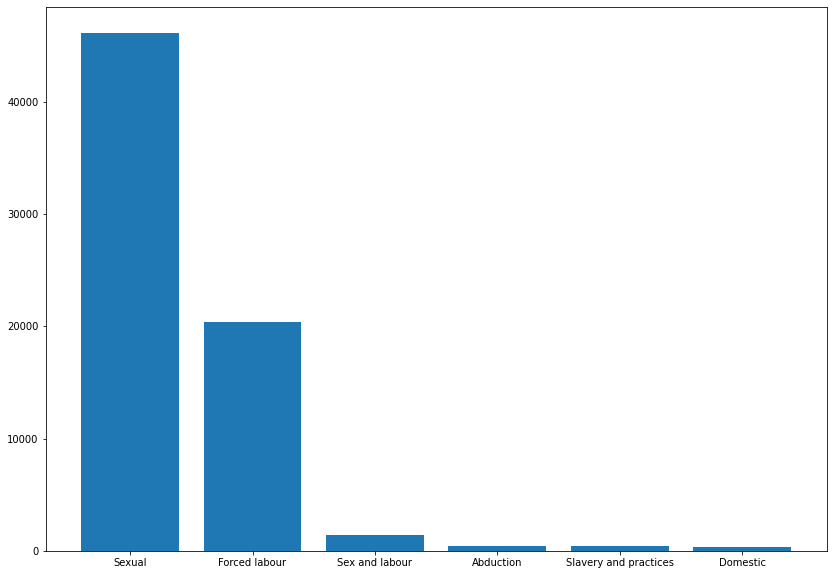

In [81]:
plt.figure(figsize=(14,10))
plt.bar(graph["index"],graph["count"])

In [85]:
fig = px.histogram(graph, x="Traffic type", y = 'count')
fig.show()

In [163]:
fig = px.bar(graph, x="Traffic type", y = 'count',
             hover_data=['Traffic type', 'count'], color='Traffic type')
fig.show()

In [138]:
HT_df

,Unnamed: 0,text,name,year,departure,arrival,latitude,longitude,gender,accuracy,meansOfControlDebtBondage,meansOfControlExcessiveWorkingHours,meansOfControlRestrictsMedicalCare,meansOfControlUsesChildren,control_method_witchcraft,meansOfControlPhysicalAbuse,meansOfControlPsychologicalAbuse,meansOfControlRestrictsFinancialAccess,meansOfControlRestrictsMovement,meansOfControlSexualAbuse,meansOfControlTakesEarnings,meansOfControlThreatOfLawEnforcement,meansOfControlThreats,meansOfControlPsychoactiveSubstances,meansOfControlWithholdsDocuments,meansOfControlWithholdsNecessities,meansOfControlFalsePromises,RecruiterRelationship,isAbduction,rec_method_online,rec_method_recagency,recruiterRelationIntimatePartner,recruiterRelationFamily,rec_method_social_media,traf_type_child,isSexualExploit,isForcedLabour,isForcedMarriage,traf_type_cmarriage,traf_type_domestic,traf_type_fcriminality,isForcedMilitary,traf_type_fpregnancy,traf_type_illegaladoption,isOrganRemoval,typeOfLabourHospitality,typeOfLabourAgriculture,typeOfLabourAquafarming,traf_industry_cleaning,typeOfLabourConstruction,typeOfLabourDomesticWork,typeOfLabourIllicitActivities,traf_subtype_forestry,traf_subtype_foodprocessing,traf_subtype_forcedbegging,traf_subtype_healthcare,traf_subtype_healthbeauty,traf_subtype_landscaping,typeOfLabourManufacturing,traf_industry_clothes_manufacturing,typeOfLabourMiningOrDrilling,typeOfSexProstitution,typeOfSexPornography,typeOfSexRemoteInteractiveServices,traf_industry_retail,traf_industry_sexualservitude,traf_industry_benefitfraud,transport_plane,transport_boat,transport_bus,transport_ferry,transport_motorbike,transport_onfoot,transport_car,transport_shippingcontainer,transport_taxi,transport_train,transport_truck,age_0_to_8,age_9_to_17,age_18_to_20,age_21_to_23,age_24_to_26,age_27_to_29,age_30-38,age_39_47,age_48+,ageBroad,url,arrival_1,arrival_2,arrival_3,theme_1,theme_2,date_slavery_from,date_slavery_to,bought_sold_for,any_money_mention,yearOfRegistration,Datasource,majorityStatus,majorityStatusAtExploit,majorityEntry,meansOfControlOther,meansOfControlNotSpecified,meansOfControlConcatenated,isOtherExploit,isSexAndLabour,isSlaveryAndPractices,typeOfExploitConcatenated,typeOfLabourBegging,typeOfLabourPeddling,typeOfLabourTransportation,typeOfLabourOther,typeOfLabourNotSpecified,typeOfLabourConcatenated,typeOfSexPrivateSexualServices,typeOfSexConcatenated,recruiterRelationFriend,recruiterRelationOther,recruiterRelationUnknown,alpha_3
0,0,My name is Vi. And I am 28 years old. I arrive...,Vi,2001.0,Vietnam,American Samoa,-14.354000,-170.773600,female,67.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,http://antislavery.ac.uk/items/show/7,American Samoa,NaN,NaN,Forced labour,NaN,NaN,NaN,[],"[('408', '$'), ('4000', '$'), ('2000', '$'), (...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASM
1,1,Thank you for the opportunity to testify befor...,Beatrice,2005.0,Sri Lanka,Lebanon,33.900000,35.500000,female,98.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,http://antislavery.ac.uk/items/show/8,Lebanon,NaN,NaN,Domestic slavery,NaN,NaN,NaN,[],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LBN
2,2,My sister and I were living in a village. We w...,Kavita,2004.0,Sri Lanka,India,24.071318,79.652396,female,97.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0

In [ ]:
#filter by country of destination
HT_df=HT_df[HT_df[“arrival_1”]==option_gender_3_graph]

In [139]:

traf_industry1 = HT_df.filter(regex=("traf_industry.*"))
traf_industry2 = HT_df.filter(regex=("typeOfLabour.*"))


In [140]:
traf_industry = pd.concat([traf_industry1, traf_industry2], axis=1, join="outer")
traf_industry

,traf_industry_cleaning,traf_industry_clothes_manufacturing,traf_industry_retail,traf_industry_sexualservitude,traf_industry_benefitfraud,typeOfLabourHospitality,typeOfLabourAgriculture,typeOfLabourAquafarming,typeOfLabourConstruction,typeOfLabourDomesticWork,typeOfLabourIllicitActivities,typeOfLabourManufacturing,typeOfLabourMiningOrDrilling,typeOfLabourBegging,typeOfLabourPeddling,typeOfLabourTransportation,typeOfLabourOther,typeOfLabourNotSpecified,typeOfLabourConcatenated
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
traf_industry.drop(columns = ['typeOfLabourNotSpecified','typeOfLabourOther'], inplace = True)
traf_industry

,traf_industry_cleaning,traf_industry_clothes_manufacturing,traf_industry_retail,traf_industry_sexualservitude,traf_industry_benefitfraud,typeOfLabourHospitality,typeOfLabourAgriculture,typeOfLabourAquafarming,typeOfLabourConstruction,typeOfLabourDomesticWork,typeOfLabourIllicitActivities,typeOfLabourManufacturing,typeOfLabourMiningOrDrilling,typeOfLabourBegging,typeOfLabourPeddling,typeOfLabourTransportation,typeOfLabourConcatenated
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
traf_industry.rename(columns = {'typeOfLabourDomesticWork': 'Domestic work', 'typeOfLabourAgriculture':'Agriculture', 'typeOfLabourConstruction': 'Construction', 'typeOfLabourManufacturing': 'Manufacturing', 'typeOfLabourHospitality': 'Hospitality', 'typeOfLabourIllicitActivities': 'Activities', 'typeOfLabourBegging': 'Begging', 'typeOfLabourAquafarming':'Aquafarming','typeOfLabourPeddling':'Peddling', 'traf_industry_clothes_manufacturing': 'Clothes manufacturing', 'typeOfLabourMiningOrDrilling': 'Mining', 'typeOfLabourTransportation': 'Transportation', 'traf_industry_sexualservitude': 'Sexual servitude', 'traf_industry_cleaning': 'Cleaning', 'traf_industry_benefitfraud': 'Benefit fraud', 'traf_industry_retail': 'Retail'}, inplace = True)
traf_industry

,Cleaning,Clothes manufacturing,Retail,Sexual servitude,Benefit fraud,Hospitality,Agriculture,Aquafarming,Construction,Domestic work,Activities,Manufacturing,Mining,Begging,Peddling,Transportation,typeOfLabourConcatenated
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
traf_industry_count = pd.DataFrame(traf_industry.sum(), columns=['count'])
traf_industry_count.sort_values(by='count', ascending=False)

/var/folders/rv/1874f2853zqf1lx4mr_wkbsc0000gn/T/ipykernel_58043/1771281460.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,count
Domestic work,3840.0
Agriculture,3678.0
Construction,2117.0
Manufacturing,888.0
Hospitality,830.0
Activities,475.0
Begging,282.0
Aquafarming,278.0
Peddling,167.0
Clothes manufacturing,55.0


In [150]:
traf_industry_count.reset_index(inplace = True)

In [151]:
traf_industry_count.rename (columns= {'index': 'Traffic industry'}, inplace = True)

In [153]:
traf_graph=traf_industry_count.sort_values(by='count', ascending=False)
traf_graph=traf_graph[traf_graph["count"]>traf_graph["count"].median()]

In [158]:
fig = px.histogram(traf_graph, x="Traffic industry", y = 'count', labels = {'x': 'Traffic industry','y':'ciao' })
fig.show()

In [165]:
fig = px.bar(traf_graph, x="Traffic industry", y = 'count',
             hover_data=['Traffic industry', 'count'], color='Traffic industry')
fig.show()